In [1]:
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import networkx as nx
import community
import pandas as pd

import numpy as np

In [3]:
import imp
tools = imp.load_source('tools', '../tools.py')

from tools import  write_to_file, test_kruskal

In [4]:
%matplotlib inline

import matplotlib.patches as mpatches
import matplotlib.lines as lines

font = {'size'   : 10,
        'weight': 'bold'}
matplotlib.rc('font', **font)

In [5]:
ipd      = pd.read_json('../data/pd_November_2018_clean.json')
anarchy  = pd.read_json('../data/anarchy_November_2018_clean.json')
auction  = pd.read_json('../data/auction_November_2018_clean.json')

dataframes = [ipd, auction, anarchy]

In [6]:
periods = []
for data in dataframes:
    period = np.sort(data['date'].unique())
    period = period[~np.isnan(period)]
    periods.append(period[1:])   

 Collaborativeness 
---------------------------

In [7]:
graphs = []
for filename in ['pd_graph.gml', 'auction_graph.gml', 'anarchy_graph.gml']:
    graphs.append(nx.read_gml('../data/networks/{}'.format(filename)))

Illustrating co-authors network
------------------------

**Use Gephi**

Network Metrics
-----------------------

In [8]:
number_edges = [nx.number_of_edges(G) for G in graphs]
number_nodes = [nx.number_of_nodes(G) for G in graphs]

In [9]:
for filename, metric in zip(['pd_edges.txt', 'pd_unique_authors.txt'], [number_edges[0], number_nodes[0]]):
    write_to_file(filename=filename, metric=metric)

Collaborative Behaviour
-----------------------------

**Network Metrics**

In [58]:
isolated_authors = [len(list(nx.isolates(G))) for G in graphs]
isolated_authors

[176, 256, 4]

In [59]:
isolated_authors_percentage = [np.round(isolated / nodes, 3) 
                               for isolated, nodes in zip(isolated_authors, number_nodes)]

In [60]:
number_connected_components = [nx.number_connected_components(G) for G in graphs]

In [61]:
subgraphs = [list(nx.connected_component_subgraphs(G)) for G in graphs]

In [62]:
largest_cc = [len(max(nx.connected_components(G), key=len)) for G in graphs]

In [63]:
clustering_coeff = [round(nx.average_clustering(G), 3) for G in graphs]

In [64]:
degree_distributions = [sorted([d for n, d in G.degree()], reverse=True) for G in graphs]
av_degree = [np.round(np.mean(degree), 3) for degree in degree_distributions]

In [65]:
communities = [community.best_partition(G) for G in graphs]
modularities = [community.modularity(partition=communities[i], graph=G) for i, G in enumerate(graphs)]

In [66]:
filenames = ['isolated_authors.txt', 'isolated_authors_percentage.txt', 'number_of_connected.txt',
             "largest_cc.txt", "av_degree.txt", "clustering_coeff.txt", "modularity_pd.txt"]

In [67]:
for i, metric in enumerate([isolated_authors, isolated_authors_percentage, number_connected_components, largest_cc,
                            av_degree, clustering_coeff, modularities]):
    write_to_file(filenames[i], metric[0])

**Degree Distribution**

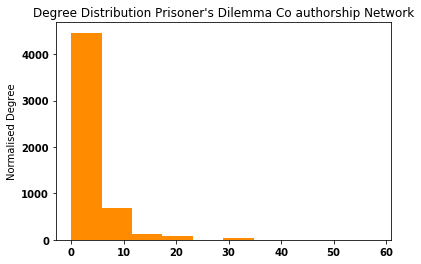

In [70]:
fig = plt.figure()

plt.hist(degree_distributions[0],  color='darkorange')
plt.ylabel('Normalised Degree')
plt.title("Degree Distribution Prisoner's Dilemma Co authorship Network")

plt.savefig('../../assets/images/pd_degree_distribution.pdf')

In [71]:
max(degree_distributions[0])

58

In [72]:
colors = ['darkorange', 'darkred', 'darkgreen']

In [73]:
labels = [r'$G_1$', r'$G_2$', r'$G_3$']

3.0
2.0
3.0


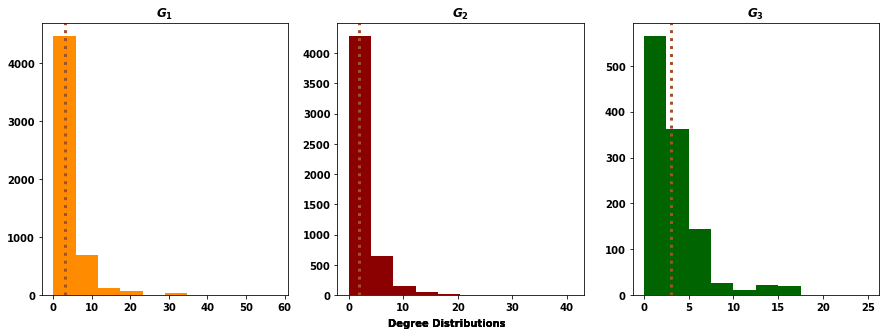

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, dstr in enumerate(degree_distributions): 
    axes[i].hist(dstr, color=colors[i]);
    median = np.median(dstr)
    print(median)
    axes[i].axvline(median, color='sienna', linestyle=':', linewidth=3, label='median')
    axes[i].title.set_text(labels[i])
    
    fig.text(0.5, 0.04, 'Degree Distributions', ha='center', fontsize=10)
    
plt.savefig('../../assets/images/networks_ditributions.pdf')

In [24]:
test_kruskal(degree_distributions)

7.566968394148878e-28 The null hypothesis can be rejected.


**Comparison between fields**

In [25]:
frame = {'# Isolated': isolated_authors, '% Isolated': isolated_authors_percentage,
         '# Connected Components': number_connected_components, 'Largest cc': largest_cc,
         'Clustering': clustering_coeff, 'Av. Degree': av_degree, 'Modularity': modularities,
         '# Edges': number_edges, '# Nodes': number_nodes}

In [26]:
table = pd.DataFrame.from_dict(frame).round(3)
table.index= ["Prisoner's Dilemma", "Auction Games", "Price of Anarchy"]

In [27]:
table

,# Connected Components,# Edges,# Isolated,# Nodes,% Isolated,Av. Degree,Clustering,Largest cc,Modularity
Prisoner's Dilemma,1356,10397,176,5394,0.033,3.855,0.708,815,0.977
Auction Games,1272,7861,256,5165,0.050,3.044,0.622,1348,0.958
Price of Anarchy,245,1952,4,1154,0.003,3.383,0.713,221,0.964


In [28]:
write_to_file(metric=table.to_latex(), filename="network_comparison.tex")

Cumulative Graphs
---------

In [76]:
import glob

In [77]:
number_of_files = len(list(glob.glob('../data/networks/G_pd_*.gml')))

In [78]:
cumulative_graphs = []
for i in range(number_of_files):
    cumulative_graphs.append(nx.read_gml('../data/networks/G_pd_{}.gml'.format(i)))

In [79]:
degree_points, largest_cc_points, number_of_cc_points, number_of_nodes, percentage_number = [], [], [], [], []
for G in cumulative_graphs:
    degree = sorted([d for n, d in G.degree()], reverse=True)
    largest_cc_points.append(len(max(nx.connected_components(G), key=len)))
    degree_points.append(np.mean(degree))
    number_of_cc_points.append(nx.number_connected_components(G))
    number_of_nodes.append(G.number_of_nodes())
    
    percentage_number.append(np.round(G.number_of_nodes() / number_nodes[0], 2))

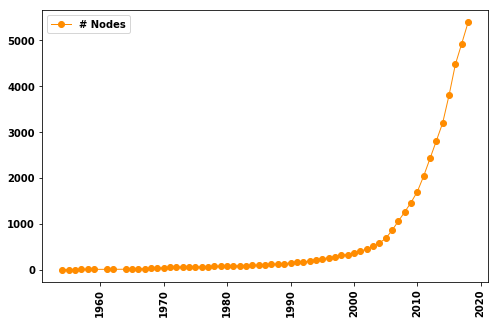

In [80]:
fig = plt.figure(figsize=(8, 5))
plt.plot(periods[0], number_of_nodes, '-o', linewidth=1, label='# Nodes', color=colors[0],)
plt.xticks(rotation=90);
plt.legend();

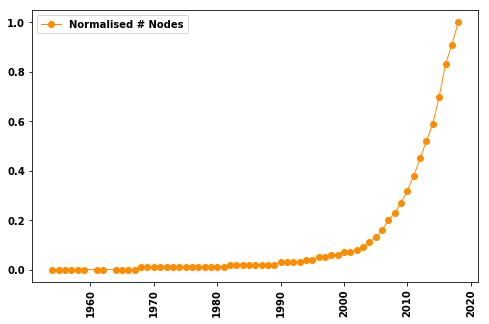

In [81]:
fig = plt.figure(figsize=(8, 5))
plt.plot(periods[0], percentage_number, '-o', linewidth=1, label='Normalised # Nodes', color=colors[0],)
plt.xticks(rotation=90);
plt.legend();

plt.savefig('../../assets/images/nodes_percentage_over_time.pdf')

In [82]:
other_topics_files = [len(list(glob.glob('../data/networks/G_auction_*.gml')))]
other_topics_files.append(len(list(glob.glob('../data/networks/G_anarchy_*.gml'))))

In [83]:
auction_graphs = [nx.read_gml('../data/networks/G_auction_{}.gml'.format(i)) for i in range(other_topics_files[0])]
anarchy_graphs = [nx.read_gml('../data/networks/G_anarchy_{}.gml'.format(i)) for i in range(other_topics_files[1])]

In [84]:
degree_points_auction, largest_cc_points_auction, number_of_cc_points_auction, number_of_nodes_auction = [], [], [], []
percentage_number_auction = []
for G in auction_graphs:
    degree = sorted([d for n, d in G.degree()], reverse=True)
    
    largest_cc_points_auction.append(len(max(nx.connected_components(G), key=len)))
    degree_points_auction.append(np.mean(degree))
    number_of_cc_points_auction.append(nx.number_connected_components(G))
    number_of_nodes_auction.append(G.number_of_nodes())
    
    percentage_number_auction.append(np.round(G.number_of_nodes() / number_nodes[1], 2))

In [85]:
degree_points_anarchy, largest_cc_points_anarchy, number_of_cc_points_anarchy, number_of_nodes_anarchy = [], [], [], []
percentage_number_anarchy = []
for G in anarchy_graphs:
    degree = sorted([d for n, d in G.degree()], reverse=True)
    
    largest_cc_points_anarchy.append(len(max(nx.connected_components(G), key=len)))
    degree_points_anarchy.append(np.mean(degree))
    number_of_cc_points_anarchy.append(nx.number_connected_components(G))
    number_of_nodes_anarchy.append(G.number_of_nodes())
    
    percentage_number_anarchy.append(np.round(G.number_of_nodes() / number_nodes[2], 2))

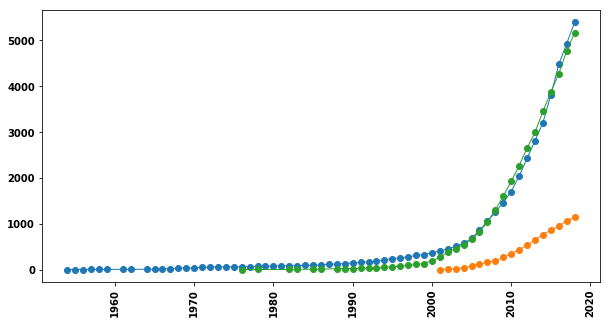

In [86]:
fig = plt.figure(figsize=(10, 5))
plt.plot(periods[0], number_of_nodes, '-o', linewidth=1, label='Number of nodes')
plt.plot(periods[2], number_of_nodes_anarchy, '-o', linewidth=1, label='Number of nodes')
plt.plot(periods[1], number_of_nodes_auction, '-o', linewidth=1, label='Number of nodes')

plt.xticks(rotation=90);

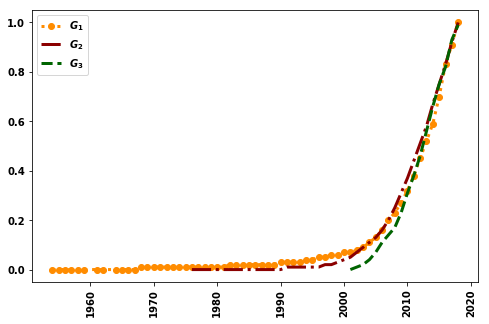

In [88]:
fig = plt.figure(figsize=(8, 5))
plt.plot(periods[0], percentage_number, ':o', linewidth=3, label='$G_1$', color=colors[0])
plt.plot(periods[1], percentage_number_auction, '-.', linewidth=3, label='$G_2$', color=colors[1])
plt.plot(periods[2], percentage_number_anarchy, '--', linewidth=3, label='$G_3$', color=colors[2])

plt.xticks(rotation=90);
plt.legend();

plt.savefig('../../assets/images/percentage_networks_nodes.pdf')

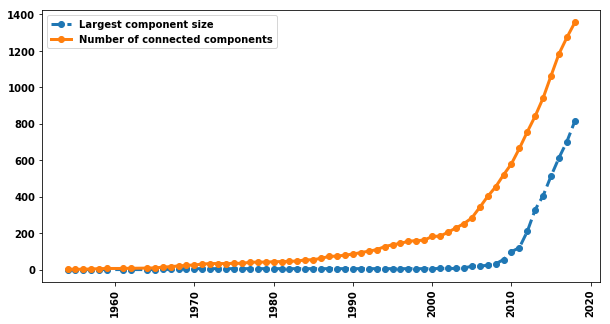

In [89]:
fig = plt.figure(figsize=(10, 5))
plt.plot(periods[0], largest_cc_points, '--o', linewidth=3, label='Largest component size');
plt.plot(periods[0], number_of_cc_points, '-o', linewidth=3, label='Number of connected components');

plt.xticks(rotation=90);
plt.legend();

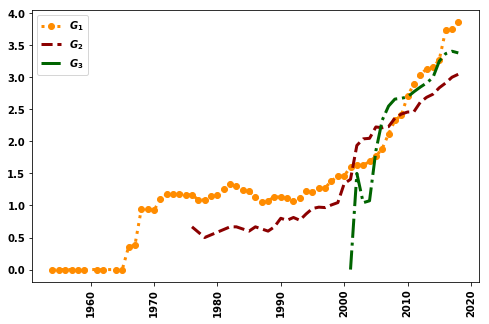

In [91]:
fig = plt.figure(figsize=(8, 5))
plt.plot(periods[0], degree_points, ':o', label='$G_1$', linewidth=3, color=colors[0]);
plt.plot(periods[1], degree_points_auction, '--', label='$G_2$', linewidth=3, color=colors[1]);
plt.plot(periods[2], degree_points_anarchy, '-.', label='$G_3$', linewidth=3, color=colors[2]);

plt.xticks(rotation=90);
plt.legend();


plt.savefig('../../assets/images/degrees_over_time.pdf')

**Metrics over time**

In [92]:
isolated_authors = [len(list(nx.isolates(G))) for G in cumulative_graphs]

In [93]:
isolated_authors_percentage = [isolated / nodes for isolated, nodes in zip(isolated_authors, number_of_nodes)]

In [94]:
number_connected_components = [nx.number_connected_components(G) for G in cumulative_graphs]

In [95]:
largest_cc = [len(max(nx.connected_components(G), key=len)) for G in cumulative_graphs]

In [96]:
clustering_coeff = [round(nx.average_clustering(G), 3) for G in cumulative_graphs]

In [97]:
degree_distributions = [sorted([d for n, d in G.degree()], reverse=True) for G in cumulative_graphs]
av_degree = [np.mean(degree) for degree in degree_distributions]

In [98]:
communities = [community.best_partition(G) for G in cumulative_graphs]

In [99]:
modularities = []
for i, G in enumerate(cumulative_graphs):
    try:
        modularities.append(community.modularity(partition=communities[i],graph=G))
    except ValueError:
        modularities.append('-')

In [100]:
frame = {'# Isolated': isolated_authors, '% Isolated': isolated_authors_percentage,
         '# Connected Components': number_connected_components, 'Largest cc': largest_cc,
         'Clustering': clustering_coeff, 'Av. Degree': av_degree, 'Modularity': modularities,
         '# Nodes': number_of_nodes}

In [101]:
import json

In [102]:
with open("../../assets/periods_dictionary.json") as json_file:
    periods_dictionary  = json.load(json_file)

In [103]:
table = pd.DataFrame.from_dict(frame).round(2)
table.index = [periods_dictionary["Period {}".format(i)] for i,_ in enumerate(table.index)]

In [104]:
table.head()

,# Connected Components,# Isolated,# Nodes,% Isolated,Av. Degree,Clustering,Largest cc,Modularity
1954 - 1950,3,3,3,1.0,0.0,0.0,1,-
1954 - 1955,2,2,2,1.0,0.0,0.0,1,-
1955 - 1956,3,3,3,1.0,0.0,0.0,1,-
1956 - 1957,4,4,4,1.0,0.0,0.0,1,-
1957 - 1958,6,6,6,1.0,0.0,0.0,1,-


In [105]:
write_to_file(metric=table.to_latex(), filename="cumulative_graphs_table.tex")